<a href="https://colab.research.google.com/github/UnnatiChitra/Linear-Regression/blob/main/Ridge_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Simple Linear Regression

In [ ]:
df=pd.read_csv('Salary_dataset.csv')
df=df.iloc[:, 1:]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,-1].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.predict(X_test)

array([[115815.30756236],
       [ 71512.92534771],
       [102618.85328566],
       [ 75283.34085534],
       [ 55488.65944028],
       [ 60201.67882482],
       [122413.53470072],
       [107331.8726702 ],
       [ 63029.49045554],
       [ 35693.97802523]])

In [ ]:
lr.coef_

array([[9426.03876907]])

In [ ]:
lr.intercept_

array([24382.73150234])

In [ ]:
X=df.iloc[:,0].values.reshape(-1,1)
y=df.iloc[:,-1].values.reshape(-1,1)

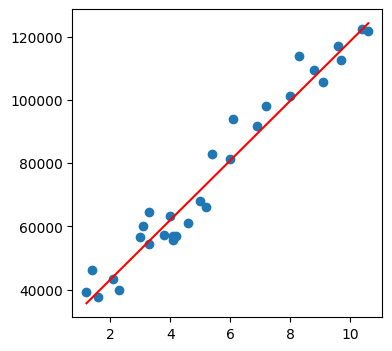

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(X, lr.predict(X), color='red')
plt.scatter(X, y)

In [ ]:
class ridge:
  def __init__(self, alpha):
    self.m=None
    self.b=None
    self.al=alpha

  def fit(self, X_train, y_train):
    num= np.sum((y_train-np.mean(y_train))*(X_train-np.mean(X_train)))
    den= np.sum((X_train-np.mean(X_train))**2)
    self.m=num/(den + self.al)
    self.b=np.mean(y_train)-self.m*np.mean(X_train)

    print(self.m, self.b)

  def predict(self, X_test):
    return self.m*X_test + self.b

In [ ]:
rr=ridge(10)

In [ ]:
rr.fit(X_train, y_train)

8806.198248198223 27556.31496922511


In [ ]:
rr.predict(X_test)

array([[112976.43797675],
       [ 71587.30621022],
       [100647.76042927],
       [ 75109.7855095 ],
       [ 56616.76918828],
       [ 61019.86831238],
       [119140.77675049],
       [105050.85955337],
       [ 63661.72778684],
       [ 38123.75286706]])

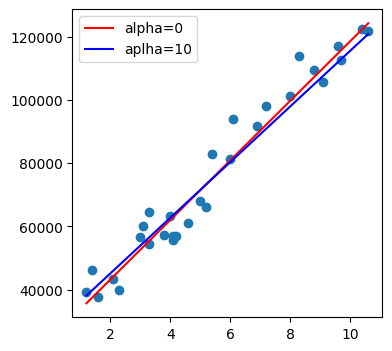

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(X, lr.predict(X), color='red', label= 'alpha=0')
plt.plot(X, rr.predict(X), color='blue', label= 'aplha=10')
plt.scatter(X, y)
plt.legend()

###Conclusion: Ridge regression does not work well with simple linear regression

# Multiple Linear Regression

In [5]:
data= pd.read_csv('economic_index.csv')
data=data.iloc[:,1:]
data.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [6]:
X2= data.iloc[:,:-1].values
y2= data.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [9]:
lr.fit(X_test, y_test)

LinearRegression()

In [10]:
lr.predict(X_test)

array([1159.,  971., 1464.,  884., 1075.])

In [14]:
class MeraRidge:

    def __init__(self,alpha=0.1):

        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):

        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

        print(self.intercept_, self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [15]:
rr= MeraRidge()

In [16]:
rr.fit(X_train ,y_train)

-581289.2773851118 [288.79481912  23.69779171  60.11517783 -48.2881328 ]


In [17]:
rr.predict(X_test)

array([1174.33835772,  916.47542358, 1403.6359069 ,  873.90865344,
       1068.90093501])

In [19]:
y_test

array([1159,  971, 1464,  884, 1075])